In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from plotly import tools
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os, json, itertools

from glob import glob
from tqdm import tqdm
from sklearn.grid_search import ParameterGrid
from sklearn import *
from copy import deepcopy
from scipy.stats import boxcox
from scipy.stats.stats import pearsonr, spearmanr
from shapely.geometry import Polygon
from collections import Counter

import statsmodels.api as sm
from scipy.stats.mstats import zscore


sns.set(color_codes=True)

loo = model_selection.LeaveOneOut()
scaler = preprocessing.StandardScaler()

data_dir = os.path.join('..','..','data')

# Dictionary File 
df_dictionary = pd.read_csv(os.path.join(data_dir,'shapefiles','csv','addrcode-dictionary.csv')) 
df_dictionary['addrcode'] = df_dictionary['addrcode'].astype('int')
df_dictionary = df_dictionary.fillna('')
df_dictionary.head(1)

,addrcode,subdistrict_th,subdistrict_en,district_code,district_th,district_en,province_code,province_th,province_en,LAT,LONG,Population
0,100101,พระบรมมหาราชวัง,Phra Borom Maha Ratchawang,1001,พระนคร,Phra Nakhon,10,กรุงเทพมหานคร,Bangkok,13.751,100.492,4089


In [2]:
df_population = pd.read_csv(os.path.join(data_dir,'population','addrcode-index','population.csv')) 
df_population['addrcode'] = df_population['addrcode'].astype('int')
df_population['province_id'] = df_population['addrcode']/10000
df_population['province_id'] = df_population['province_id'].astype('int')
df_population = df_population.set_index('addrcode')
df_population['province'] = ''
df_population.loc[df_population['province_id'] == 10, 'province'] = 'Bangkok'
df_population.loc[df_population['province_id'] == 80, 'province'] = 'Nakhon-Si'
df_population.loc[df_population['province_id'] == 81, 'province'] = 'Krabi'
df_population = df_population.groupby('province').sum()
df_population = df_population.drop(['province_id'], axis=1)
df_population.head()

,population
province,
Bangkok,5686646
Krabi,465931
Nakhon-Si,1585030


In [3]:
df_cases = pd.read_csv(os.path.join(data_dir,'dengue-cases','dengue-cases.csv')) 
df_cases['date'] = pd.to_datetime(df_cases['date'], format='%Y-%m')
df_cases['addrcode'] = df_cases['addrcode'].astype('int')
df_cases['province_id'] = df_cases['addrcode']/10000
df_cases['province_id'] = df_cases['province_id'].astype('int')
df_cases['province'] = ''
df_cases.loc[df_cases['province_id'] == 10, 'province'] = 'Bangkok'
df_cases.loc[df_cases['province_id'] == 80, 'province'] = 'Nakhon-Si'
df_cases.loc[df_cases['province_id'] == 81, 'province'] = 'Krabi'
df_cases = df_cases.drop('province_id', axis=1)
df_cases = df_cases.set_index('addrcode')
df_cases = df_cases.set_index('date')
df_cases = df_cases.sort_index()
df_cases = df_cases['2015':'2017']
df_cases = df_cases.groupby(['province','date']).sum()
df_cases = df_cases.join(df_population).copy()
df_cases['norm_cases'] = 10000*df_cases['cases']/df_cases['population']
df_cases = df_cases.drop(['cases','population'], axis=1)
df_cases.head()


norm_cases
province date                  
Bangkok  2015-01-01    1.079723
         2015-02-01    0.780777
         2015-03-01    0.735055
         2015-04-01    0.728021
         2015-05-01    1.760264

In [4]:
df_cases = df_cases.unstack(level=0).copy()
df_cases.head()

norm_cases                    
province      Bangkok     Krabi Nakhon-Si
date                                     
2015-01-01   1.079723  1.545293  1.129316
2015-02-01   0.780777  1.137507  0.725538
2015-03-01   0.735055  0.837034  0.555195
2015-04-01   0.728021  1.352132  0.479486
2015-05-01   1.760264  2.382327  0.485795

Text(0,0.5,'Dengue Cases per 10,000 People')

Text(0.5,0,'Date')

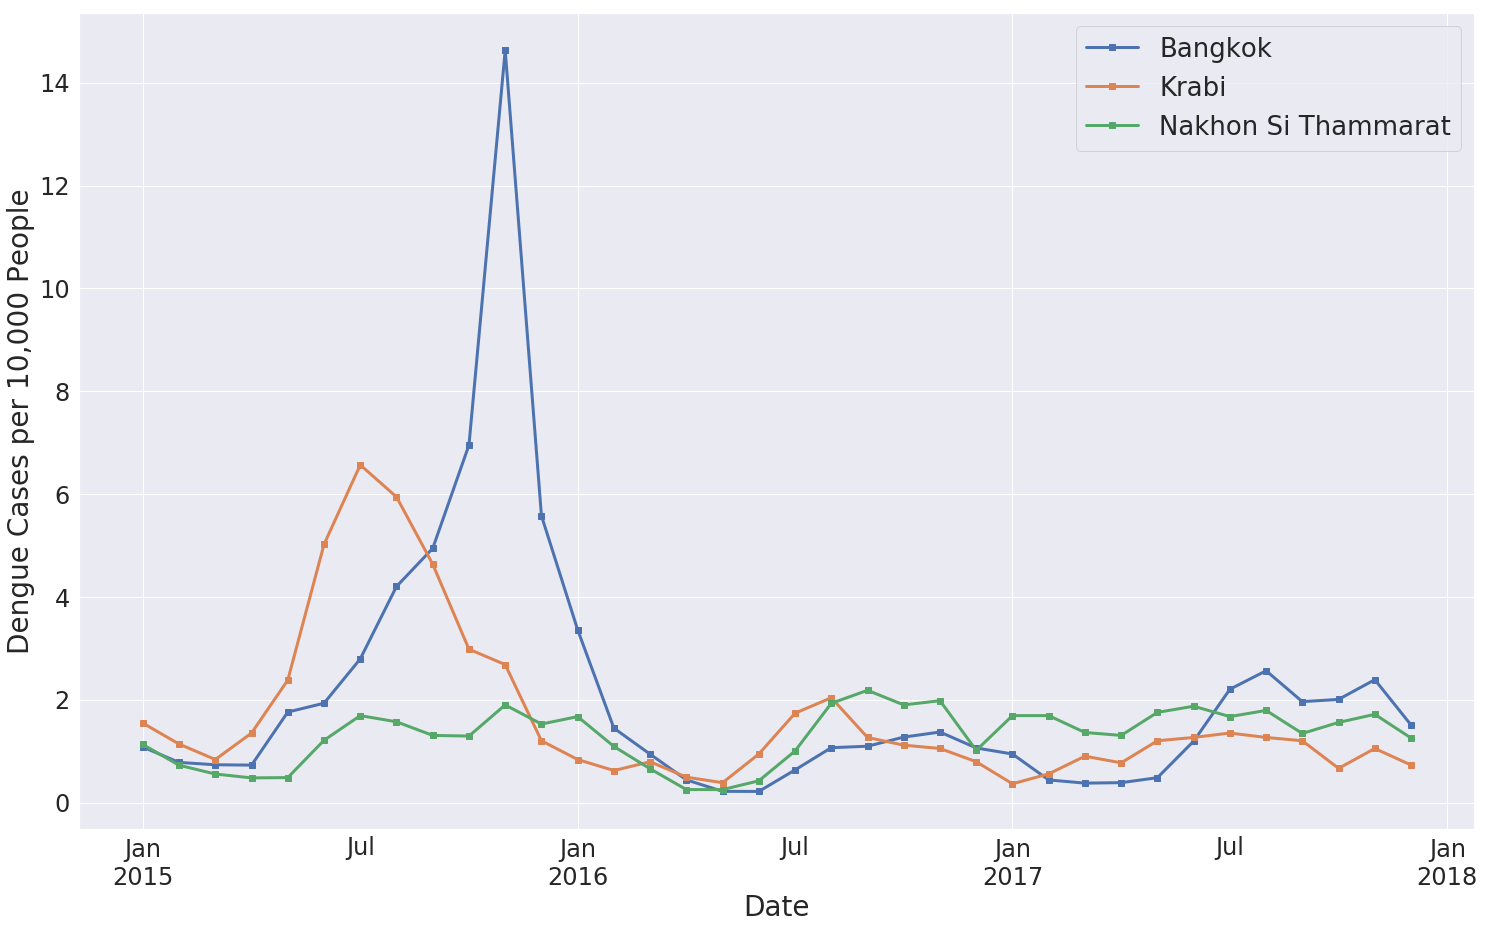

In [41]:
ax = df_cases.plot(figsize=(25,15), fontsize=24, marker='s', linewidth=3, )
ax.set_ylabel("Dengue Cases per 10,000 People", fontsize=28)
ax.set_xlabel("Date", fontsize=28)
ax.legend(["Bangkok", "Krabi", "Nakhon Si Thammarat"], fontsize=26)


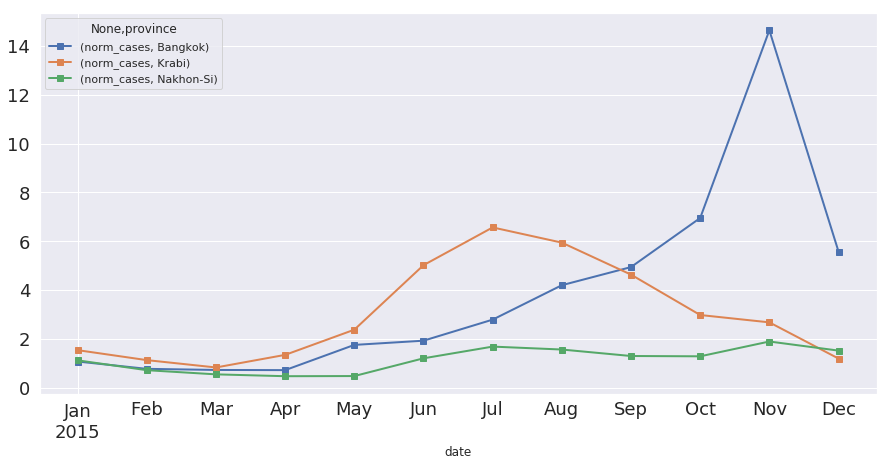

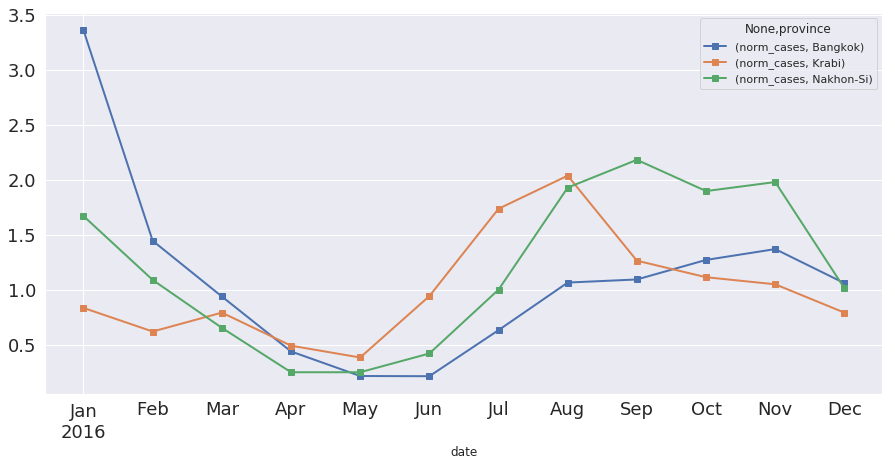

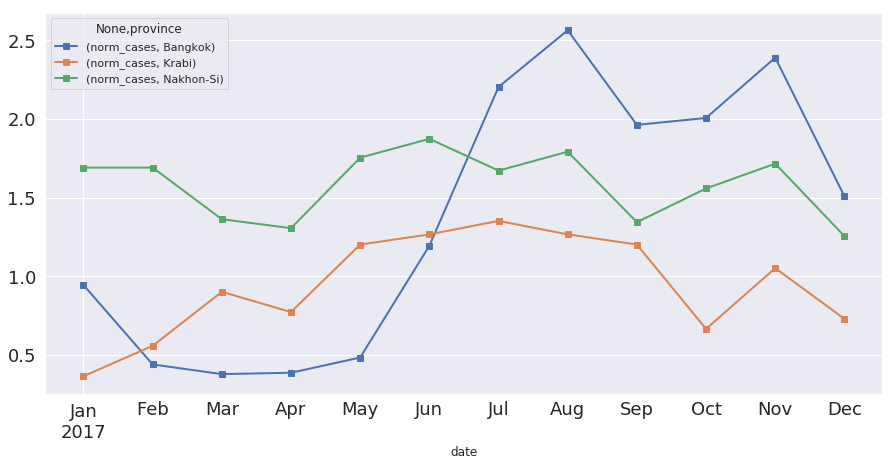

In [36]:
df_cases['2015'].plot(figsize=(15,7), fontsize=18, marker='s', linewidth=2)
df_cases['2016'].plot(figsize=(15,7), fontsize=18, marker='s', linewidth=2)
df_cases['2017'].plot(figsize=(15,7), fontsize=18, marker='s', linewidth=2)